The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('pima(1).csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [6]:
col_names = ['pregnancy', 'glucose', 'blood_preasure', 'skin_thikness', 'insulin', 'bmi', 'pedigree_function', 'age', 'test']
df.columns = col_names
df.head()

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age,test
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancy            768 non-null int64
glucose              768 non-null int64
blood_preasure       768 non-null int64
skin_thikness        768 non-null int64
insulin              768 non-null int64
bmi                  768 non-null float64
pedigree_function    768 non-null float64
age                  762 non-null float64
test                 768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [10]:
nan_index = df[df['age'].isnull()].index
nan_index

Int64Index([22, 25, 26, 34, 44, 58], dtype='int64')

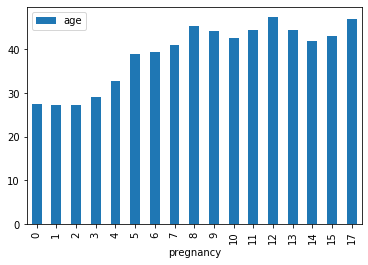

In [14]:
df[['age', 'pregnancy']].groupby('pregnancy').mean().plot(kind = 'bar')

In [15]:
df['age'] = df[['age', 'pregnancy']].groupby('pregnancy').transform(lambda x: x.fillna(x.mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancy            768 non-null int64
glucose              768 non-null int64
blood_preasure       768 non-null int64
skin_thikness        768 non-null int64
insulin              768 non-null int64
bmi                  768 non-null float64
pedigree_function    768 non-null float64
age                  768 non-null float64
test                 768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [16]:
df.iloc[nan_index]

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age,test
22,7,196,90,0,0,39.8,0.451,41.095238,1
25,10,125,70,26,115,31.1,0.205,42.636364,1
26,7,147,76,0,0,39.4,0.257,41.095238,1
34,10,122,78,31,0,27.6,0.512,42.636364,0
44,7,159,64,0,0,27.4,0.294,41.095238,0
58,0,146,82,0,0,40.5,1.781,27.454545,0


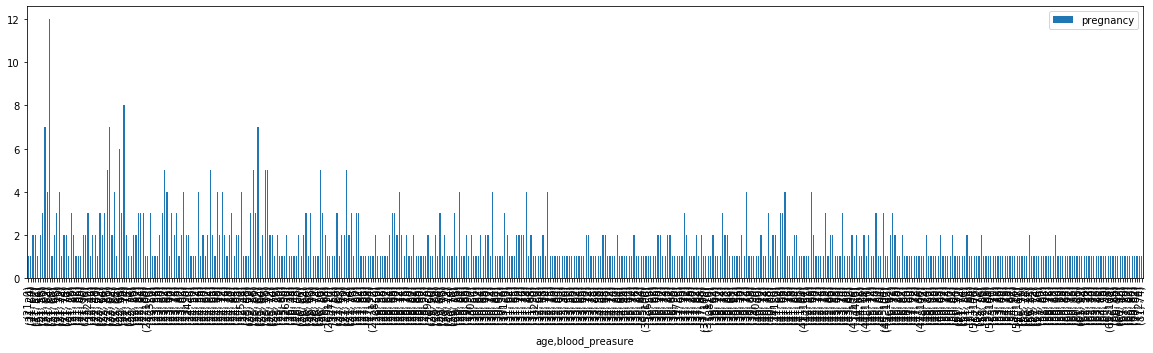

In [22]:
df[['age', 'pregnancy', 'blood_preasure']].groupby(['age', 'blood_preasure']).count().plot(kind = 'bar', figsize = (20,5))

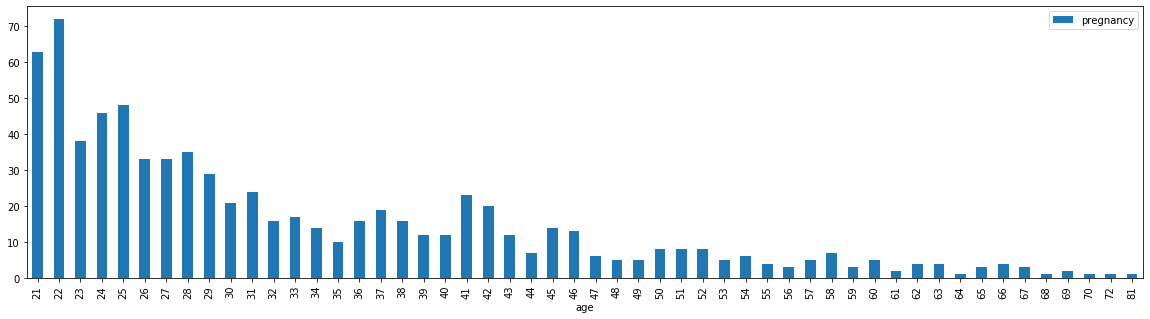

In [21]:
df['age'] = df['age'].astype(int)
df[['age', 'pregnancy']].groupby('age').count().plot(kind = 'bar', figsize = (20,5))

In [23]:
df['age_interval'] = pd.cut(df['age'], bins = [20, 30, 40, 50, 60, 70, 80, 90])
df.head()

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age,test,age_interval
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]"


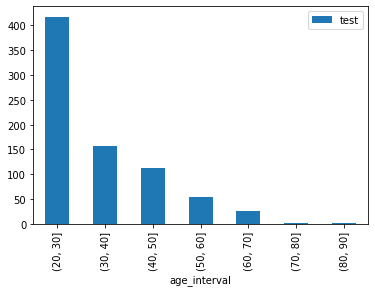

In [25]:
df[['age_interval', 'test']].groupby('age_interval').count().plot(kind = 'bar')

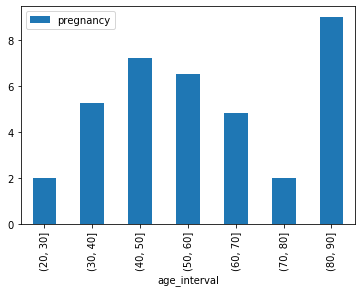

In [27]:
df[['age_interval', 'pregnancy']].groupby('age_interval').mean().plot(kind = 'bar')

# Preparing the dataset for ML

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
df['test'].unique()

array([1, 0], dtype=int64)

In [31]:
df['test'].sum()/df['test'].count()

0.3489583333333333

In [33]:
1 - df['test'].mean()

0.6510416666666667

In [37]:
X = df.drop(['test', 'age_interval'], axis = 1)
y = df['test']

In [38]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [39]:
X_train_org.head()

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns= X.columns)
X_train_df.head()

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age
0,0.529412,0.449495,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000
1,0.058824,0.595960,0.475410,0.363636,0.111111,0.496274,0.078138,0.033333
2,0.000000,0.459596,0.655738,0.000000,0.000000,0.482861,0.223313,0.100000
3,0.705882,0.707071,0.672131,0.434343,0.384161,0.584203,0.192143,0.616667
4,0.529412,0.732323,0.655738,0.464646,0.153664,0.564829,0.238685,0.316667


In [46]:
X_test_df.describe()

,pregnancy,glucose,blood_preasure,skin_thikness,insulin,bmi,pedigree_function,age
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.227022,0.606613,0.552211,0.189552,0.078778,0.467120,0.172449,0.186892
std,0.188493,0.165875,0.166433,0.157865,0.127702,0.113776,0.140383,0.182742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009394,0.000000
25%,0.058824,0.500000,0.491803,0.000000,0.000000,0.396423,0.075149,0.050000
50%,0.176471,0.575758,0.573770,0.202020,0.000000,0.464978,0.125534,0.116667
75%,0.352941,0.693182,0.639344,0.323232,0.124113,0.529806,0.248506,0.300000
max,0.764706,1.005051,0.934426,0.505051,0.803783,0.788376,0.774979,0.733333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE3ABBA588>,
      dtype=object)

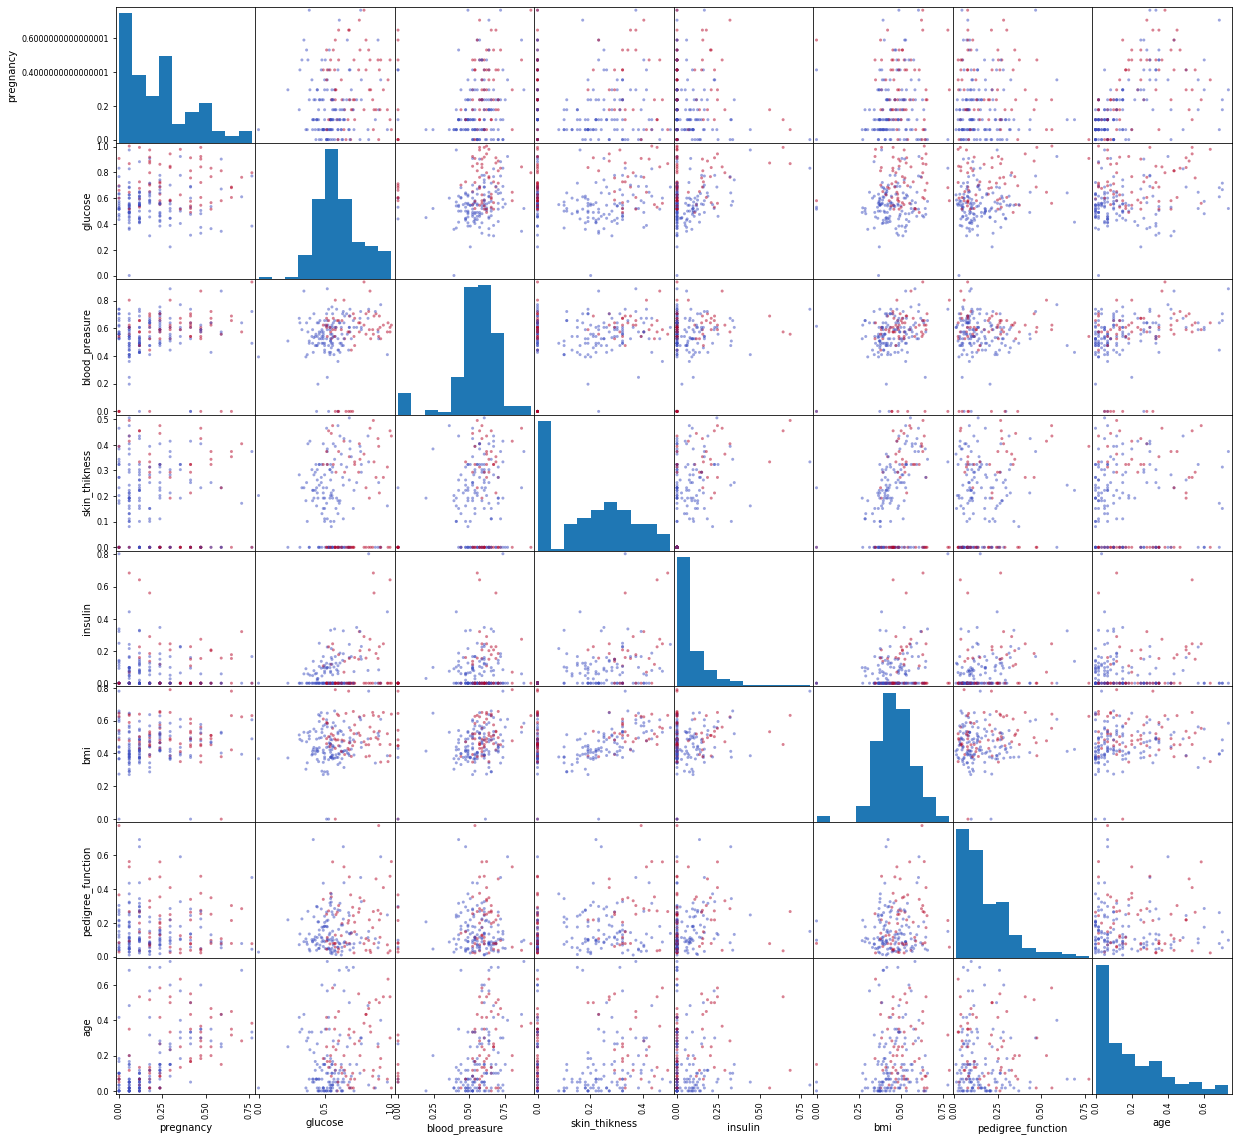

In [64]:
from matplotlib import cm

pd.plotting.scatter_matrix(X_test_df, figsize = (20,20), c = y_test, cmap = cm.get_cmap('coolwarm') )

# SVC

In [47]:
from sklearn.svm import SVC, LinearSVC

clf1 = SVC(kernel = 'linear', C = 0.01)
clf1.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
clf1.coef_

array([[ 0.04980515,  0.16921907, -0.0143248 ,  0.02554419,  0.02240027,
         0.08049218,  0.05680529,  0.04674167]])

In [49]:
clf1.intercept_

array([-1.14831109])

c:\users\nxs045000\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\nxs045000\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


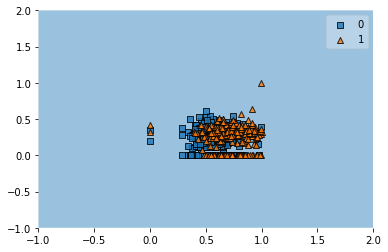

In [68]:
from mlxtend.plotting import plot_decision_regions
X2D = X_train_df[['glucose','skin_thikness']]

clf_2d = SVC(kernel = 'rbf', C = 0.01)
clf_2d.fit(X2D, y_train)
plot_decision_regions(X2D.values, y_train.values, clf = clf_2d)

In [57]:
X2D.values

array([[0.33532042, 0.2       ],
       [0.49627422, 0.03333333],
       [0.4828614 , 0.1       ],
       ...,
       [0.3681073 , 0.        ],
       [0.4485842 , 0.23333333],
       [0.        , 0.8       ]])

In [69]:
clf1.score(X_train, y_train)

0.6423611111111112

In [70]:
clf1.score(X_test, y_test)

0.6770833333333334

# Logisitic Regression

In [74]:
train_prb = lreg.predict_proba(X_train)
test_prb = lreg.predict_proba(X_test)

In [77]:
train_pred = (train_prb[:, 1] > 0.55).astype(int)
test_pred = (test_prb[:, 1] > 0.55).astype(int)

In [79]:
from sklearn.metrics import accuracy_score
print('train score: ', accuracy_score(y_train, train_pred))
print('test score: ', accuracy_score(y_test, test_pred))

train score:  0.7621527777777778
test score:  0.8072916666666666
